<a href="https://colab.research.google.com/github/alishermutalov/ML-learning/blob/ml/05_ml_16_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Clustering

### Amaliyot: Mijozlarni klasterlash

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


#### Ma'lumotlarni tozalash
`Address` ustuni matnli. Masofa hisoblashda esa bu ustundan foydalan olmaymiz, shuning bu ustunni tashglab yuboramiz.

In [3]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Normalizasiya**

`Customer Id` ustunidan boshqa barcha ustunlarni normalizasiya qilamiz.

In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Model
Dataset turli mijozlarning yoshi, ishlagan yillar soni, daromadi, qarzi ka'bi ma'lumotlardan iborat. Maqsadimiz shu ma'lumotlardan foydalangan holda mijozlarni truli klasterlarga ajratish.

In [5]:
k = 3
k_means = KMeans(n_clusters = k) # init va n_init standart qiymatlarni qabul qiladi, biz faqat klasterlar sonini ko'rsatdik.
k_means.fit(norm_data)
print(k_means.labels_)

[0 1 1 2 1 0 0 0 2 0 0 0 2 0 2 2 2 2 0 0 2 0 2 0 1 0 2 0 0 0 0 0 2 0 0 2 2
 2 2 1 2 1 2 1 0 1 2 2 2 0 0 1 2 0 1 2 2 2 0 0 0 0 0 1 2 0 0 2 2 2 0 0 0 2
 0 2 0 2 1 0 0 1 1 0 0 2 2 2 2 2 0 0 2 2 0 0 0 0 2 2 2 1 0 2 2 1 0 2 0 0 0
 2 0 2 2 0 2 0 1 0 2 2 2 0 0 0 2 2 2 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 1 2 0 2
 2 2 0 0 2 0 0 0 0 0 2 2 2 0 0 0 2 0 2 0 2 0 1 2 2 2 0 2 0 2 2 0 2 0 2 1 2
 1 0 0 0 0 2 0 0 2 0 2 2 0 1 2 1 2 2 0 0 0 0 1 0 2 0 0 0 0 0 2 2 1 0 0 2 0
 0 2 2 2 1 2 2 0 0 0 2 2 1 2 0 2 1 2 2 0 2 2 0 0 0 0 0 2 2 2 0 2 0 2 0 2 2
 2 0 1 0 2 1 0 0 1 0 0 2 2 0 0 0 2 2 2 2 2 2 1 0 2 1 2 0 2 0 1 2 0 2 1 2 2
 2 2 2 1 0 0 2 2 2 0 0 2 2 0 0 2 0 2 0 2 0 2 0 2 1 0 1 2 2 0 2 2 0 0 0 1 2
 0 0 0 2 1 0 0 0 0 0 2 1 0 2 2 2 0 1 2 0 2 0 0 1 2 2 2 1 2 2 2 0 2 0 0 1 0
 2 2 0 0 2 2 2 0 2 2 0 2 2 0 1 0 0 2 2 0 2 1 0 1 2 0 2 0 0 2 2 0 2 2 2 1 2
 0 0 0 0 0 2 2 2 0 1 2 1 0 0 1 2 0 1 0 0 0 2 2 1 0 2 2 1 2 0 2 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 2 2 1 2 2 2 2 0 0 1 2 0 2 0 0 2 0 1 1 0 0 0 0 2 0 0 0 2 2
 2 0 2 0 2 0 1 2 2 2 1 0 

Mijozalr klasterlarga ajratildi. Keling bu ma'lumnotlarni df ga qo'shamiz.

In [6]:
df['cluster'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


### Klasterlar haqida nima deya olamiz?
Har bir klaster sentrodini topish orqali kalsterlar haqida ma'lumot olishimiz mumkin. Buning uchun esa `groupby` va `mean` funksiyalaridan foydalanamiz

In [10]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,422.572222,39.413889,1.513889,11.572222,49.875000,1.106681,2.358894,0.039007,7.547500
1,420.770642,41.541284,2.100917,15.944954,104.981651,5.226606,9.595046,0.362637,17.008257
2,429.619423,29.023622,1.784777,3.614173,26.971129,0.976882,1.894738,0.425076,10.695276


Har bir klasterdagi mijozlar haqida qanday xulosa qilish mumkin?

Masalan, yoshiga (`Age`) qaraydigan bo'lsak 0-klaster katta yoshlar (43+), 1-klaster o'rta yosh (33+), 2-klaster yoshlar (31 gacha).

Har bir klasterni yaqqol ajratib turuvchi ustunlar bu `Income` (daromad) va `Year Employed` (necha yildan beri ishlashi) ekan.

Demak biz har klasterni quyidagicha ta'riflashimiz mumkin:
- 0-klaster - Katta yosh, uzoq tajribaga ega, katta daromad qiluvchi mijozlar.
- 1-klaster - Yosh, kam tajriba va kam daromad mijozlar.
- 2-klaster - O'rta yosh, 7+ yil tarjibaga ega, kam daromad mijozlar.

Umuman olganda siz aynan sizning biznesingiz uchun muhim ustunlar bo'yicha klasterlarga nom berishingiz mumkin, masalan moliya xizamtini yo'lga qo'ygan bo'lsangiz (muddatli to'lov, kredit) qarzlar (`Debt`) va qarzni qaytarmaganlik (`Deafulted`) ustunlariga ahamiyat bergan bo'lar edim.

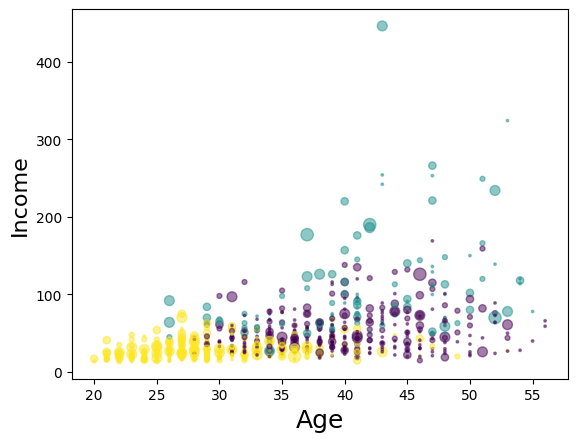

In [11]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

Axes3D hozirgi zamonaviy Matplotlib'da plt.figure().add_subplot(projection='3d') usuli bilan almashtirilgan.
rect=[0, 0, .95, 1] parametridan foydalanish ko'p hollarda kerak emas.

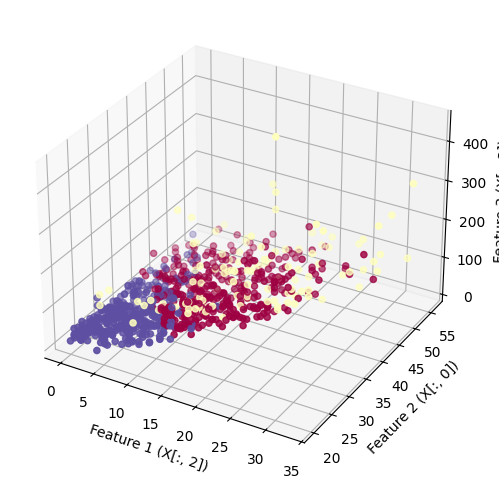

In [16]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(1, figsize=(8, 6))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)

# plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
# ax.set_xlabel('Years Employed')
# ax.set_ylabel('Age')
# ax.set_zlabel('Income')

# ax.scatter(X[:, 2], X[:, 0], X[:, 3], c= k_means.labels_.astype(float))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# O‘qlar nomlari
ax.set_xlabel('Feature 1 (X[:, 2])')
ax.set_ylabel('Feature 2 (X[:, 0])')
ax.set_zlabel('Feature 3 (X[:, 3])')

# 3D nuqtalar va ranglash
ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_means.labels_.astype(float), cmap='Spectral')
plt.show()